# **GRAY-LEVEL DIFFERENCE**

The gray-level-difference statistic is an analysis tool that examines the difference between the pixel of interest and its neighbors. Like a gray-level histogram, it calculates the distribution of the difference. 

In the target image, we consider pixel pair (i,j) . Pixel j is in a position to pixel i that is direction θ and range r. Pixel values of pixel i and j let li and lj , and difference l′ are defined as follows: 

*l’ =| li - lj |*

We defined probability Pδ( l’) as difference statistics, where δ=(θ,r) .
 P(l) is replaced to Pδ( l’) , and seven features of δ are calculated. Features are calculated for each δ , and we let their averages with respect to δ be seven features of Gray-level difference. 

In [214]:
# Enter Path
path = 'original.jpg'

In [215]:
from PIL import Image             
import numpy as np                 
import matplotlib.pyplot as plt  
import cv2 

%matplotlib inline

In [216]:
I = Image.open(path)
I.show()

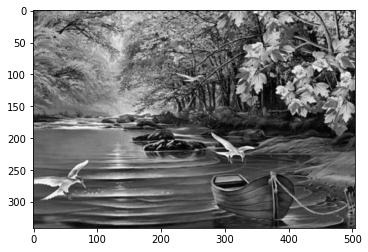

In [217]:
plt.imshow(np.asarray(I))
plt.show()

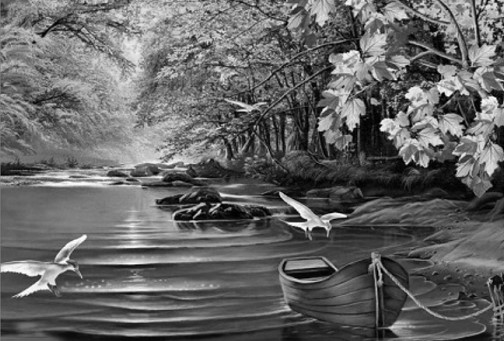

In [218]:
def image_show(path) :
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  from google.colab.patches import cv2_imshow
  cv2_imshow(img)

image_show(path)

In [219]:
print (I.size, I.mode, I.format)

(504, 341) RGB JPEG


In [220]:
I1 = I.convert('L') # 'L' for gray scale mode
print (I1.mode)

L


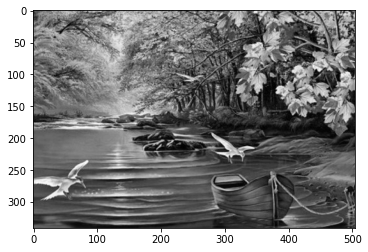

In [221]:
plt.imshow(np.asarray(I1), cmap='gray')
plt.show()

In [222]:
a = np.asarray(I1,dtype=np.float64)
print(a)

[[109.  97.  96. ... 203. 202. 194.]
 [112.  93.  96. ... 184. 161. 166.]
 [103.  72.  80. ... 113.  81. 104.]
 ...
 [118. 102. 103. ...  52.  64.  74.]
 [112.  96.  97. ...  57.  63.  78.]
 [112.  96.  97. ...  48.  38.  46.]]


In [223]:
# Calculating Gray level difference statistics for two pixels at angle 0 degree.

In [224]:
row = np.shape(a)[0]
print (row)

341


In [225]:
col = np.shape(a)[1]
print (col)

504


In [226]:
f_delta = a;

In [227]:
for i in range(row):
  for j in range(col-1):
    f_delta[i][j] = abs(a[i][j] - a[i][j+1])

print(f_delta)

[[ 12.   1.   1. ...   1.   8. 194.]
 [ 19.   3.   5. ...  23.   5. 166.]
 [ 31.   8.  15. ...  32.  23. 104.]
 ...
 [ 16.   1.   2. ...  12.  10.  74.]
 [ 16.   1.   2. ...   6.  15.  78.]
 [ 16.   1.   3. ...  10.   8.  46.]]


In [228]:
f_delta0 = f_delta[1:row][1:col-1]
print(f_delta0)


[[ 31.   8.  15. ...  32.  23. 104.]
 [ 46.  10.  23. ...  20.  53. 111.]
 [ 50.  10.  16. ...  55.  67. 177.]
 ...
 [ 16.   1.   2. ...  12.  10.  74.]
 [ 16.   1.   2. ...   6.  15.  78.]
 [ 16.   1.   3. ...  10.   8.  46.]]


In [229]:
[p_delta, x] = np.histogram(f_delta0, bins=256)

print(np.shape(p_delta))

x = np.delete(x, 0)
print(np.shape(x))


print(x)



(256,)
(256,)
[  0.8125   1.625    2.4375   3.25     4.0625   4.875    5.6875   6.5
   7.3125   8.125    8.9375   9.75    10.5625  11.375   12.1875  13.
  13.8125  14.625   15.4375  16.25    17.0625  17.875   18.6875  19.5
  20.3125  21.125   21.9375  22.75    23.5625  24.375   25.1875  26.
  26.8125  27.625   28.4375  29.25    30.0625  30.875   31.6875  32.5
  33.3125  34.125   34.9375  35.75    36.5625  37.375   38.1875  39.
  39.8125  40.625   41.4375  42.25    43.0625  43.875   44.6875  45.5
  46.3125  47.125   47.9375  48.75    49.5625  50.375   51.1875  52.
  52.8125  53.625   54.4375  55.25    56.0625  56.875   57.6875  58.5
  59.3125  60.125   60.9375  61.75    62.5625  63.375   64.1875  65.
  65.8125  66.625   67.4375  68.25    69.0625  69.875   70.6875  71.5
  72.3125  73.125   73.9375  74.75    75.5625  76.375   77.1875  78.
  78.8125  79.625   80.4375  81.25    82.0625  82.875   83.6875  84.5
  85.3125  86.125   86.9375  87.75    88.5625  89.375   90.1875  91.
  91.8125  92

In [230]:
pp = sum(p_delta)
print (pp)

170856


In [231]:
p_delta0 = p_delta/pp

print(p_delta0)

[7.72229246e-02 1.33334504e-01 9.94755818e-02 7.67078710e-02
 6.08875310e-02 0.00000000e+00 4.99484946e-02 4.33815611e-02
 3.80554385e-02 3.27351688e-02 0.00000000e+00 2.88020321e-02
 2.62618814e-02 2.33705577e-02 2.16263988e-02 0.00000000e+00
 1.94140095e-02 1.80210236e-02 1.63822166e-02 1.58261928e-02
 1.40352109e-02 0.00000000e+00 1.27709884e-02 1.18169687e-02
 1.18169687e-02 1.02366905e-02 0.00000000e+00 9.20658332e-03
 8.75005853e-03 8.33450391e-03 7.69653978e-03 0.00000000e+00
 7.15807464e-03 6.84201901e-03 6.47914033e-03 5.85873484e-03
 5.64803109e-03 0.00000000e+00 5.41976869e-03 4.96324390e-03
 4.65889404e-03 4.62377675e-03 0.00000000e+00 4.24919230e-03
 3.82778480e-03 3.48831765e-03 3.11373320e-03 0.00000000e+00
 3.24249661e-03 3.12543897e-03 2.69817858e-03 2.56356230e-03
 2.42894601e-03 0.00000000e+00 2.45821042e-03 2.01924428e-03
 2.03680292e-03 2.10703751e-03 0.00000000e+00 1.83195205e-03
 1.82024629e-03 1.75586459e-03 1.59783677e-03 0.00000000e+00
 1.41639743e-03 1.322751

In [232]:
arr = np.linspace(1, 256,  256)
sqr = np.square(arr)

In [233]:
x_sqr = np.square(x)
p_delta0_1 = np.multiply(x_sqr, p_delta0)
Contrast=sum(p_delta0_1)

print(Contrast)

352.2494117625003


In [234]:
epsilon=1.0
while epsilon+1>1:
    epsilon=epsilon/2
epsilon=epsilon*2

print (epsilon)

2.220446049250313e-16


In [235]:
#computing entropy

entropy = -sum(np.multiply(p_delta0 , np.log2(p_delta0 + epsilon)))

print(entropy)

4.906212314985648


In [236]:
#computing mean

x= np.multiply(arr, p_delta0)
mean = (1/256)*sum(x)

print(mean)

0.055788916360853584
